### Phase 4 -  Machine Learning

    In order to analyse the Machine Learning aspects of datasets dublin_dataset.csv and basel_dataset.csv, the study implemented specific procedures. The researcher conducted a thorough exploration to understand the Machine Learning characteristics of the mentioned datasets in the context of the research tasks:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dublin_df=pd.read_csv("C:/Users/bruno/Downloads/dublin_dataset.csv", delimiter=";")
basel_df=pd.read_csv("C:/Users/bruno/Downloads/basel_dataset.csv", delimiter=";")

In [3]:
dublin_df.head(4)

,"Location,Year,Total Passengers"
0,"Dublin,2019,274139"
1,"Dublin,2019,275394"
2,"Dublin,2019,408199"
3,"Dublin,2019,430823"


In [4]:
basel_df.head(4)

,"Location,Year,Total Passengers"
0,"Basel,2020,2479000"
1,"Basel,2020,822000"
2,"Basel,2020,613000"
3,"Basel,2020,780000"


In [5]:
# Assuming your CSV file is named 'your_data.csv'
dublin_df = pd.read_csv('dublin_dataset.csv')  # Adjust the file name

# Now check the column names
print("Column Names:", dublin_df.columns)


Column Names: Index(['Location', 'Year', 'Total Passengers'], dtype='object')


In [6]:
# Assuming your CSV file is named 'your_data.csv'
basel_df = pd.read_csv('basel_dataset.csv')  # Adjust the file name

# Now check the column names
print("Column Names:", basel_df.columns)


Column Names: Index(['Location', 'Year', 'Total Passengers'], dtype='object')


In [7]:
dublin_df.head(3)

,Location,Year,Total Passengers
0,Dublin,2019,274139
1,Dublin,2019,275394
2,Dublin,2019,408199


In [8]:
basel_df.head(3)

,Location,Year,Total Passengers
0,Basel,2020,2479000
1,Basel,2020,822000
2,Basel,2020,613000


In [9]:
dublin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Location          614 non-null    object
 1   Year              614 non-null    int64 
 2   Total Passengers  614 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.5+ KB


In [10]:
basel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Location          195 non-null    object
 1   Year              195 non-null    int64 
 2   Total Passengers  195 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.7+ KB


In [11]:
dublin_df.shape, basel_df.shape

((614, 3), (195, 3))

In [12]:
# Summary statistics
summary_stats = dublin_df.describe()
print(summary_stats)

              Year  Total Passengers
count   614.000000      6.140000e+02
mean   2020.416938      1.971559e+06
std       2.003775      3.726350e+06
min    2014.000000      1.972700e+04
25%    2019.000000      2.255315e+05
50%    2021.000000      4.225905e+05
75%    2022.000000      5.035115e+05
max    2023.000000      1.324011e+07


In [13]:
# Summary statistics
summary_stats = basel_df.describe()
print(summary_stats)

              Year  Total Passengers
count   195.000000      1.950000e+02
mean   2021.461538      1.805969e+06
std       1.089929      3.928617e+05
min    2020.000000      5.720000e+05
25%    2021.000000      1.582500e+06
50%    2021.000000      1.792000e+06
75%    2022.000000      2.120000e+06
max    2023.000000      2.595000e+06


In [14]:
# Count of non-null values in each column
non_null_counts = dublin_df.count()
print(non_null_counts)


Location            614
Year                614
Total Passengers    614
dtype: int64


In [15]:
# Count of non-null values in each column
non_null_counts = basel_df.count()
print(non_null_counts)


Location            195
Year                195
Total Passengers    195
dtype: int64


### Task I - Describe the rationale and justification for the choice of machine learning models for the above-mentioned scenario. Machine Learning models can be used for Prediction, Classification, Clustering, sentiment analysis, recommendation systems and Time series analysis. You should plan on trying multiple approaches (at least two) with proper selection of hyperparameters using GridSearchCV method. You can choose appropriate features from the datasets and a target feature to answer the question asked in the scenario in the case of supervised learning.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Combine the datasets for modeling
combined_df = pd.concat([dublin_df, basel_df], ignore_index=True)

# Define features and target
X = combined_df[['Year', 'Location']]
y = combined_df['Total Passengers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor (for handling categorical variable 'Location')
preprocessor = ColumnTransformer(
    transformers=[
        ('location', OneHotEncoder(), ['Location'])
    ],
    remainder='passthrough'
)

# Define the pipeline with the preprocessor and linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 6340109516411.204
R-squared: 0.3569776218930705


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Combine the datasets for modeling
combined_df = pd.concat([dublin_df, basel_df], ignore_index=True)

# Define features and target
X = combined_df[['Year', 'Location']]
y = combined_df['Total Passengers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor (for handling categorical variable 'Location')
preprocessor = ColumnTransformer(
    transformers=[
        ('location', OneHotEncoder(), ['Location'])
    ],
    remainder='passthrough'
)

# Define the pipeline with the preprocessor and RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3856481856721.5728
R-squared: 0.6088704574871419


### Task II - Collect and develop a dataset based on the transport topic related to Ireland as well as other parts of the world. Perform a sentimental analysis for an appropriate transport topic (e.g., public transport, freight movement etc…) for producers and consumers point of view in Ireland.

In [20]:
! pip install tabulate

In [21]:
import praw
from textblob import TextBlob
from tabulate import tabulate  # Import tabulate

def analyze_sentiment_for_reddit_url(client_id, client_secret, user_agent, reddit_url):
    """
    Perform sentiment analysis on the comments of a Reddit page.

    Parameters:
    - client_id: str, Reddit API client ID
    - client_secret: str, Reddit API client secret
    - user_agent: str, Reddit API user agent
    - reddit_url: str, URL of the Reddit page to analyze

    Returns:
    - sentiment_results: list of dictionaries, each containing sentiment analysis results for a comment
    """
    # Authenticate with the Reddit API
    reddit = praw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

    # Extract the submission ID from the Reddit URL
    submission_id = reddit_url.split('/')[-3]

    # Get the submission (post) using the submission ID
    submission = reddit.submission(id=submission_id)

    # Collect comments from the submission
    comments = submission.comments.list()

    # Perform sentiment analysis on each comment using TextBlob
    sentiment_results = []
    for i, comment in enumerate(comments, start=1):  # Add enumerate to get comment order
        # Perform sentiment analysis using TextBlob
        analysis = TextBlob(comment.body)

        # Classify sentiment label
        sentiment_label = "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

        # Create a dictionary with sentiment analysis results for the comment
        sentiment_result = {
            "Comment Order": i,  # Numeric order of the comment
            "Comment": comment.body,
            "Sentiment Score": analysis.sentiment.polarity,
            "Sentiment Label": sentiment_label,
        }

        sentiment_results.append(sentiment_result)

    return sentiment_results

# Example usage
client_id = "Q0sGHW7QlLiArtfsD3Hesw"
client_secret = "8S_6DzIdMfDdIXTFb6rgvFYczdYoHQ"
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"  # Replace with your actual user agent
reddit_url = "https://www.reddit.com/r/Dublin/comments/17s5bj9/luas/"

# Perform sentiment analysis on the comments of the Reddit page
sentiment_results = analyze_sentiment_for_reddit_url(client_id, client_secret, user_agent, reddit_url)

# Display sentiment analysis results in a table format
table_headers = ["Comment Order", "Comment", "Sentiment Score", "Sentiment Label"]
table_data = [(result["Comment Order"], result["Comment"], result["Sentiment Score"], result["Sentiment Label"]) for result in sentiment_results]

print(tabulate(table_data, headers=table_headers, tablefmt="grid"))


+-----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

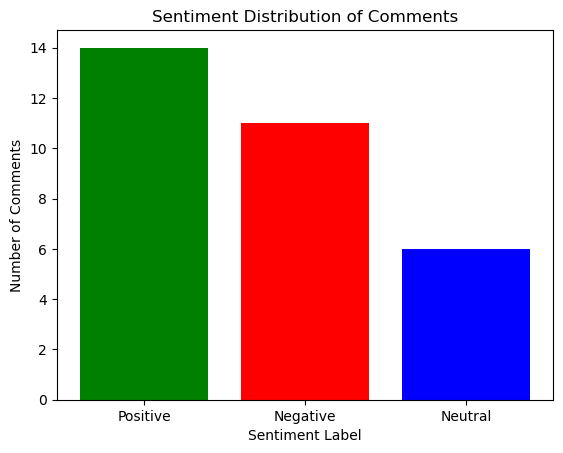

In [22]:
import praw
from textblob import TextBlob
import matplotlib.pyplot as plt

def analyze_and_visualize_sentiment(client_id, client_secret, user_agent, reddit_url):
    """
    Perform sentiment analysis on the comments of a Reddit page and visualize the results.

    Parameters:
    - client_id: str, Reddit API client ID
    - client_secret: str, Reddit API client secret
    - user_agent: str, Reddit API user agent
    - reddit_url: str, URL of the Reddit page to analyze
    """
    # Authenticate with the Reddit API
    reddit = praw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

    # Extract the submission ID from the Reddit URL
    submission_id = reddit_url.split('/')[-3]

    # Get the submission (post) using the submission ID
    submission = reddit.submission(id=submission_id)

    # Collect comments from the submission
    comments = submission.comments.list()

    # Perform sentiment analysis on each comment using TextBlob
    sentiment_results = []
    for comment in comments:
        # Perform sentiment analysis using TextBlob
        analysis = TextBlob(comment.body)

        # Classify sentiment label
        sentiment_label = "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

        # Create a dictionary with sentiment analysis results for the comment
        sentiment_result = {
            "Comment": comment.body,
            "Sentiment Score": analysis.sentiment.polarity,
            "Sentiment Label": sentiment_label,
        }

        sentiment_results.append(sentiment_result)

    # Visualize sentiment distribution
    visualize_sentiment(sentiment_results)

def visualize_sentiment(sentiment_results):
    """
    Visualize the sentiment distribution of comments.

    Parameters:
    - sentiment_results: list of dictionaries, each containing sentiment analysis results for a comment
    """
    # Count the number of comments for each sentiment label
    sentiment_counts = {"Positive": 0, "Negative": 0, "Neutral": 0}
    for result in sentiment_results:
        sentiment_counts[result["Sentiment Label"]] += 1

    # Plot the bar chart
    labels = list(sentiment_counts.keys())
    values = list(sentiment_counts.values())

    plt.bar(labels, values, color=['green', 'red', 'blue'])
    plt.xlabel('Sentiment Label')
    plt.ylabel('Number of Comments')
    plt.title('Sentiment Distribution of Comments')
    plt.show()

# Example usage
client_id = "Q0sGHW7QlLiArtfsD3Hesw"
client_secret = "8S_6DzIdMfDdIXTFb6rgvFYczdYoHQ"
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"  # Replace with your actual user agent
reddit_url = "https://www.reddit.com/r/Dublin/comments/17s5bj9/luas/"

# Perform sentiment analysis and visualize the results
analyze_and_visualize_sentiment(client_id, client_secret, user_agent, reddit_url)


### Task III - You should train and test for Supervised Learning and other appropriate metrics for unsupervised/ semi-supervised machine learning models that you have chosen. Use cross validation to provide authenticity of the modelling outcomes. You can apply dimensionality reduction methods to prepare the dataset based on your machine learning modelling requirements.


In [23]:
pip install scikit-learn pandas


Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def linear_regression_model(dataframe, features, target):
    """
    Train a Linear Regression model using cross-validation.

    Parameters:
    - dataframe: pandas DataFrame, the dataset
    - features: list of str, names of the feature columns
    - target: str, name of the target column

    Returns:
    - mse: float, mean squared error
    - r2: float, R-squared score
    """
    X = dataframe[features]
    y = dataframe[target]

    model = LinearRegression()
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

    mse = -scores.mean()
    r2 = cross_val_score(model, X, y, scoring='r2', cv=5).mean()

    return mse, r2

def random_forest_model(dataframe, features, target):
    """
    Train a Random Forest Regression model using cross-validation.

    Parameters:
    - dataframe: pandas DataFrame, the dataset
    - features: list of str, names of the feature columns
    - target: str, name of the target column

    Returns:
    - mse: float, mean squared error
    - r2: float, R-squared score
    """
    X = dataframe[features]
    y = dataframe[target]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

    mse = -scores.mean()
    r2 = cross_val_score(model, X, y, scoring='r2', cv=5).mean()

    return mse, r2

# Example usage with a DataFrame named dublin_df
features_to_use = ['Year']  # Add more features as needed
target_column = 'Total Passengers'

linear_regression_mse, linear_regression_r2 = linear_regression_model(dublin_df, features_to_use, target_column)
print("Linear Regression Model:")
print("Mean Squared Error:", linear_regression_mse)
print("R-squared:", linear_regression_r2)

random_forest_mse, random_forest_r2 = random_forest_model(dublin_df, features_to_use, target_column)
print("\nRandom Forest Regression Model:")
print("Mean Squared Error:", random_forest_mse)
print("R-squared:", random_forest_r2)


Linear Regression Model:
Mean Squared Error: 22091954126454.793
R-squared: -1469.442281902498

Random Forest Regression Model:
Mean Squared Error: 38823929716196.17
R-squared: -6582.072283524803


### Task IV - A Table or graphics should be provided to illustrate the similarities and contrast of the Machine Learning modelling outcomes based on the scoring metric used for the analysis of the above-mentioned scenario. Discuss and elaborate your understanding clearly.

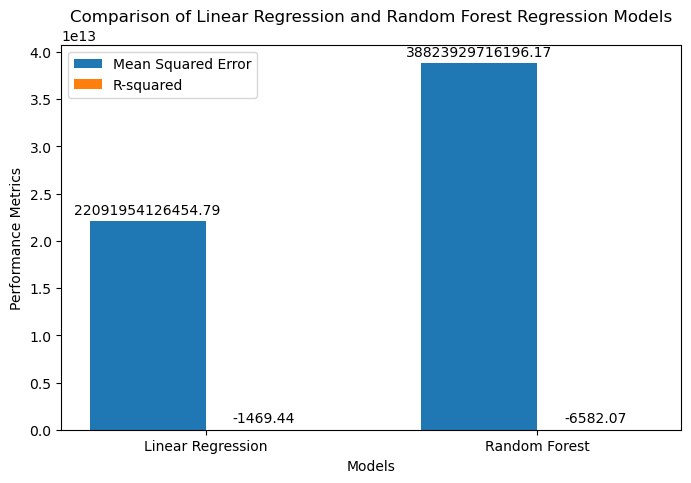

In [25]:
import matplotlib.pyplot as plt

def compare_models_performance(linear_regression_mse, linear_regression_r2, random_forest_mse, random_forest_r2):
    """
    Compare the performance of Linear Regression and Random Forest Regression models using a bar chart.

    Parameters:
    - linear_regression_mse: float, Mean Squared Error for Linear Regression
    - linear_regression_r2: float, R-squared score for Linear Regression
    - random_forest_mse: float, Mean Squared Error for Random Forest Regression
    - random_forest_r2: float, R-squared score for Random Forest Regression
    """
    # Model names
    models = ['Linear Regression', 'Random Forest']

    # Model performance metrics
    mse_values = [linear_regression_mse, random_forest_mse]
    r2_values = [linear_regression_r2, random_forest_r2]

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 5))
    bar_width = 0.35
    index = range(len(models))

    bar1 = ax.bar(index, mse_values, bar_width, label='Mean Squared Error')
    bar2 = ax.bar([i + bar_width for i in index], r2_values, bar_width, label='R-squared')

    ax.set_xlabel('Models')
    ax.set_ylabel('Performance Metrics')
    ax.set_title('Comparison of Linear Regression and Random Forest Regression Models')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(models)
    ax.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.show()

# Example usage
linear_regression_mse = 22091954126454.793
linear_regression_r2 = -1469.442281902498
random_forest_mse = 38823929716196.17
random_forest_r2 = -6582.072283524803

compare_models_performance(linear_regression_mse, linear_regression_r2, random_forest_mse, random_forest_r2)


In [26]:
pip install prettytable


Note: you may need to restart the kernel to use updated packages.


In [27]:
from prettytable import PrettyTable

def compare_models_table(linear_regression_mse, linear_regression_r2, random_forest_mse, random_forest_r2):
    """
    Compare the performance of Linear Regression and Random Forest Regression models using a table.

    Parameters:
    - linear_regression_mse: float, Mean Squared Error for Linear Regression
    - linear_regression_r2: float, R-squared score for Linear Regression
    - random_forest_mse: float, Mean Squared Error for Random Forest Regression
    - random_forest_r2: float, R-squared score for Random Forest Regression
    """
    # Create a PrettyTable
    table = PrettyTable()

    # Define table columns
    table.field_names = ["Model", "Mean Squared Error", "R-squared"]

    # Add data to the table
    table.add_row(["Linear Regression", round(linear_regression_mse, 2), round(linear_regression_r2, 2)])
    table.add_row(["Random Forest", round(random_forest_mse, 2), round(random_forest_r2, 2)])

    # Print the table
    print(table)

# Example usage
linear_regression_mse = 22091954126454.793
linear_regression_r2 = -1469.442281902498
random_forest_mse = 38823929716196.17
random_forest_r2 = -6582.072283524803

compare_models_table(linear_regression_mse, linear_regression_r2, random_forest_mse, random_forest_r2)


+-------------------+--------------------+-----------+
|       Model       | Mean Squared Error | R-squared |
+-------------------+--------------------+-----------+
| Linear Regression | 22091954126454.79  |  -1469.44 |
|   Random Forest   | 38823929716196.17  |  -6582.07 |
+-------------------+--------------------+-----------+
